# Decision Tree (Company)

A decision tree is a supervised machine learning algorithm used for both classification and regression tasks. It is a hierarchical tree-like structure consisting of nodes that represent decisions, tests, or attributes, and branches that represent the outcomes or decisions following those tests. Decision trees are used for making decisions or predictions based on input features by traversing the tree from the root node to a leaf node.
They contain 
##### Root Node, Internal Node, Branches and Leaf Node.

Criteria we are going to use in this assignments are:
### Gini Impurities:
1.Measures the impurity or disorder of a set of items.
2.A lower Gini index indicates higher purity and better separation of classes.
3.Used in classification tasks.
4.The Gini impurity is calculated as the sum of the squared probabilities of each class being chosen times (1 minus the probability of that class).
### Entropy:
1.Measures the amount of disorder or randomness in a set of items.
2.Lower entropy indicates higher purity and better separation of classes.
3.Used in classification tasks.
4.The entropy is calculated using the negative sum of the probabilities of each class times the logarithm of those probabilities.

# Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


## Importing libraries

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing

In [9]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\OneDrive\Desktop\Assignment files\DT assignment

18-01-2023  20:03    <DIR>          .
18-01-2023  20:03    <DIR>          ..
18-01-2023  19:55    <DIR>          .ipynb_checkpoints
18-01-2023  20:03         2,390,808 Assignment no. 14 - (company).ipynb
09-01-2023  21:15           824,189 Assignment no. 14 - (Fraud check).ipynb
12-12-2022  14:31            17,023 Company_Data.csv
12-12-2022  14:31            21,837 Fraud_check.csv
12-12-2022  14:31             1,377 problem statement(company data).txt
12-12-2022  14:31               460 Problem_statement(Fraudcheck).txt
               6 File(s)      3,255,694 bytes
               3 Dir(s)  119,790,309,376 bytes free


## Reading File

In [10]:
# Reading the company data with help of pandas
company = pd.read_csv('Company_Data.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## EDA

In [11]:
# Shape of company
company.shape

(400, 11)

In [12]:
# Describing file
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [13]:
# Information of file
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [14]:
# Checking duplicated
company.duplicated().sum()

0

In [15]:
# Counting companies value count
company.value_counts()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban  US 
0.00   139        24      0            358         185    Medium     79   15         No     No     1
8.65   123        76      18           218         120    Medium     29   14         No     Yes    1
8.75   143        77      25           448         156    Medium     43   17         Yes    Yes    1
8.74   155        80      0            237         124    Medium     37   14         Yes    No     1
8.73   129        76      16           58          121    Medium     69   12         Yes    Yes    1
                                                                                                  ..
6.01   131        29      11           335         127    Bad        33   12         Yes    Yes    1
5.99   117        42      10           371         121    Bad        26   14         Yes    Yes    1
5.98   124        56      11           447         134    Medium     53   12         No     Yes 

## Visualization

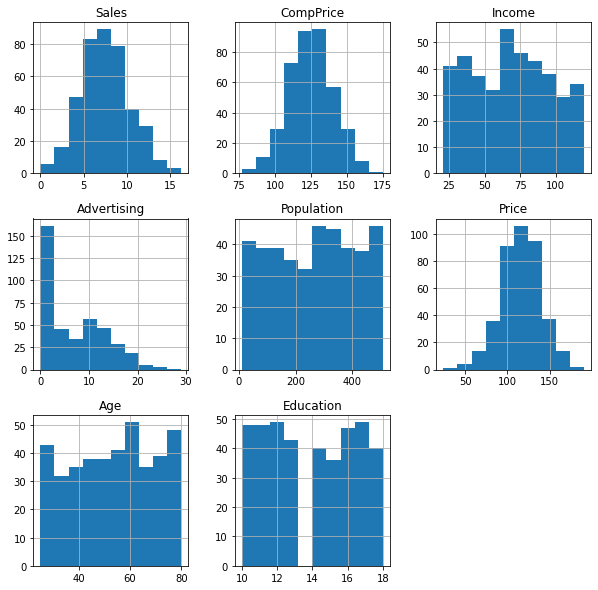

In [43]:
# Histogram for all columns
company.hist(figsize=(10,10))
plt.show()

<AxesSubplot:>

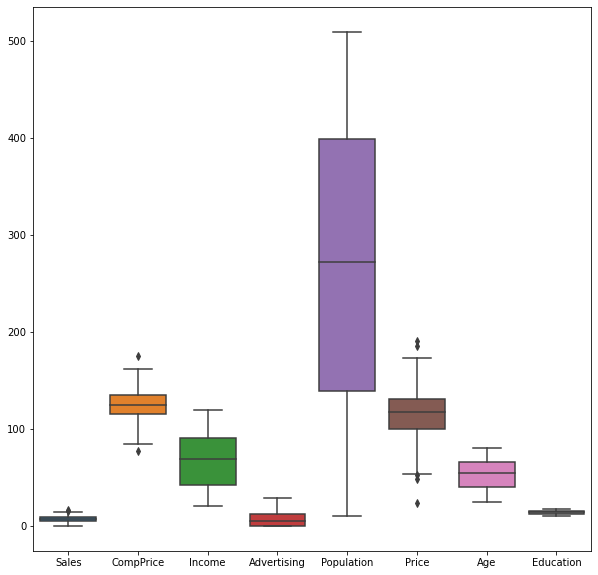

In [50]:
# Boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=company)

C:\Users\Sayali Hatwar\anaconda3\aaa\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


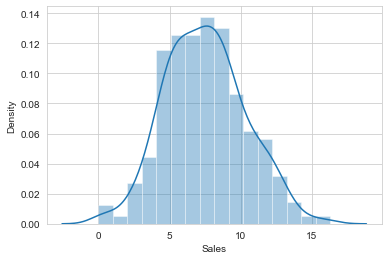

In [65]:
# Distplot for sales
sns.set_style('whitegrid')
sns.distplot(company['Sales'],kde=True)
plt.show()

## Data Preprocessing

In [16]:
# Calculating bins 
bins=np.linspace(min(company['Sales']), max(company['Sales']), 4 )
bins

array([ 0.        ,  5.42333333, 10.84666667, 16.27      ])

In [17]:
# Giving label names 
label_names=['high','medium','low']

In [18]:
# Trasforming numerical Sales data into categorical Sales_bin data 
company['Sales_bin']=pd.cut(company['Sales'],bins,labels=label_names,include_lowest = True)
company[['Sales','Sales_bin']].head(10)

,Sales,Sales_bin
0,9.50,medium
1,11.22,low
2,10.06,medium
3,7.40,medium
4,4.15,high
5,10.81,medium
6,6.63,medium
7,11.85,low
8,6.54,medium
9,4.69,high


In [19]:
# dropping previous sales data giving name to new data
company1 = company.drop(['Sales'],axis=1)
company1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,Bad,42,17,Yes,Yes,medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,low
2,113,35,10,269,80,Medium,59,12,Yes,Yes,medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,medium
4,141,64,3,340,128,Bad,38,13,Yes,No,high


## Label Encoder Implementation

In [20]:
# applying label encoder on sales_bin
label_encoder = preprocessing.LabelEncoder()
company1['Sales_bin']= label_encoder.fit_transform(company1['Sales_bin']) 

In [21]:
# applying label encoder  on ShelveLoc, Urban, US
company1['ShelveLoc']= label_encoder.fit_transform(company1['ShelveLoc']) 
company1['Urban'] =label_encoder.fit_transform(company1['Urban'])
company1['US']=label_encoder.fit_transform(company1['US'])
company1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,1
396,139,23,3,37,120,2,55,11,0,1,2
397,162,26,12,368,159,2,40,18,1,1,2
398,100,79,7,284,95,0,50,12,1,1,2


In [22]:
# Calculating company1 sample
company1.sample()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
365,154,30,0,122,162,2,57,17,0,0,2


## Splitting Output and Input variables

In [23]:
# distiguishing the features from data
X = company1.iloc[:,:-1]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [24]:
# distiguishing target from data
Y = company1['Sales_bin']
Y

0      2
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    2
399    2
Name: Sales_bin, Length: 400, dtype: int32

In [25]:
# finding categorical names of Sales_bin
company1['Sales_bin'].unique()

array([2, 1, 0])

In [26]:
# Value count of company1
company1.Sales_bin.value_counts()

2    247
0    102
1     51
Name: Sales_bin, dtype: int64

## Splitting of traingin and testing data

In [27]:
# Spliting training and testing data
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=15)

In [28]:
# x training and testing shape
x_train.shape , x_test.shape

((320, 10), (80, 10))

In [29]:
# y training and testing shape
y_train.shape,y_test.shape

((320,), (80,))

## Building decision tree model using 'gini' criteria

In [30]:
# applying decision tree classifier and fitting model
model1 = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5,max_depth=10)
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [31]:
# predicting model
pred1 = model1.predict(x_test)

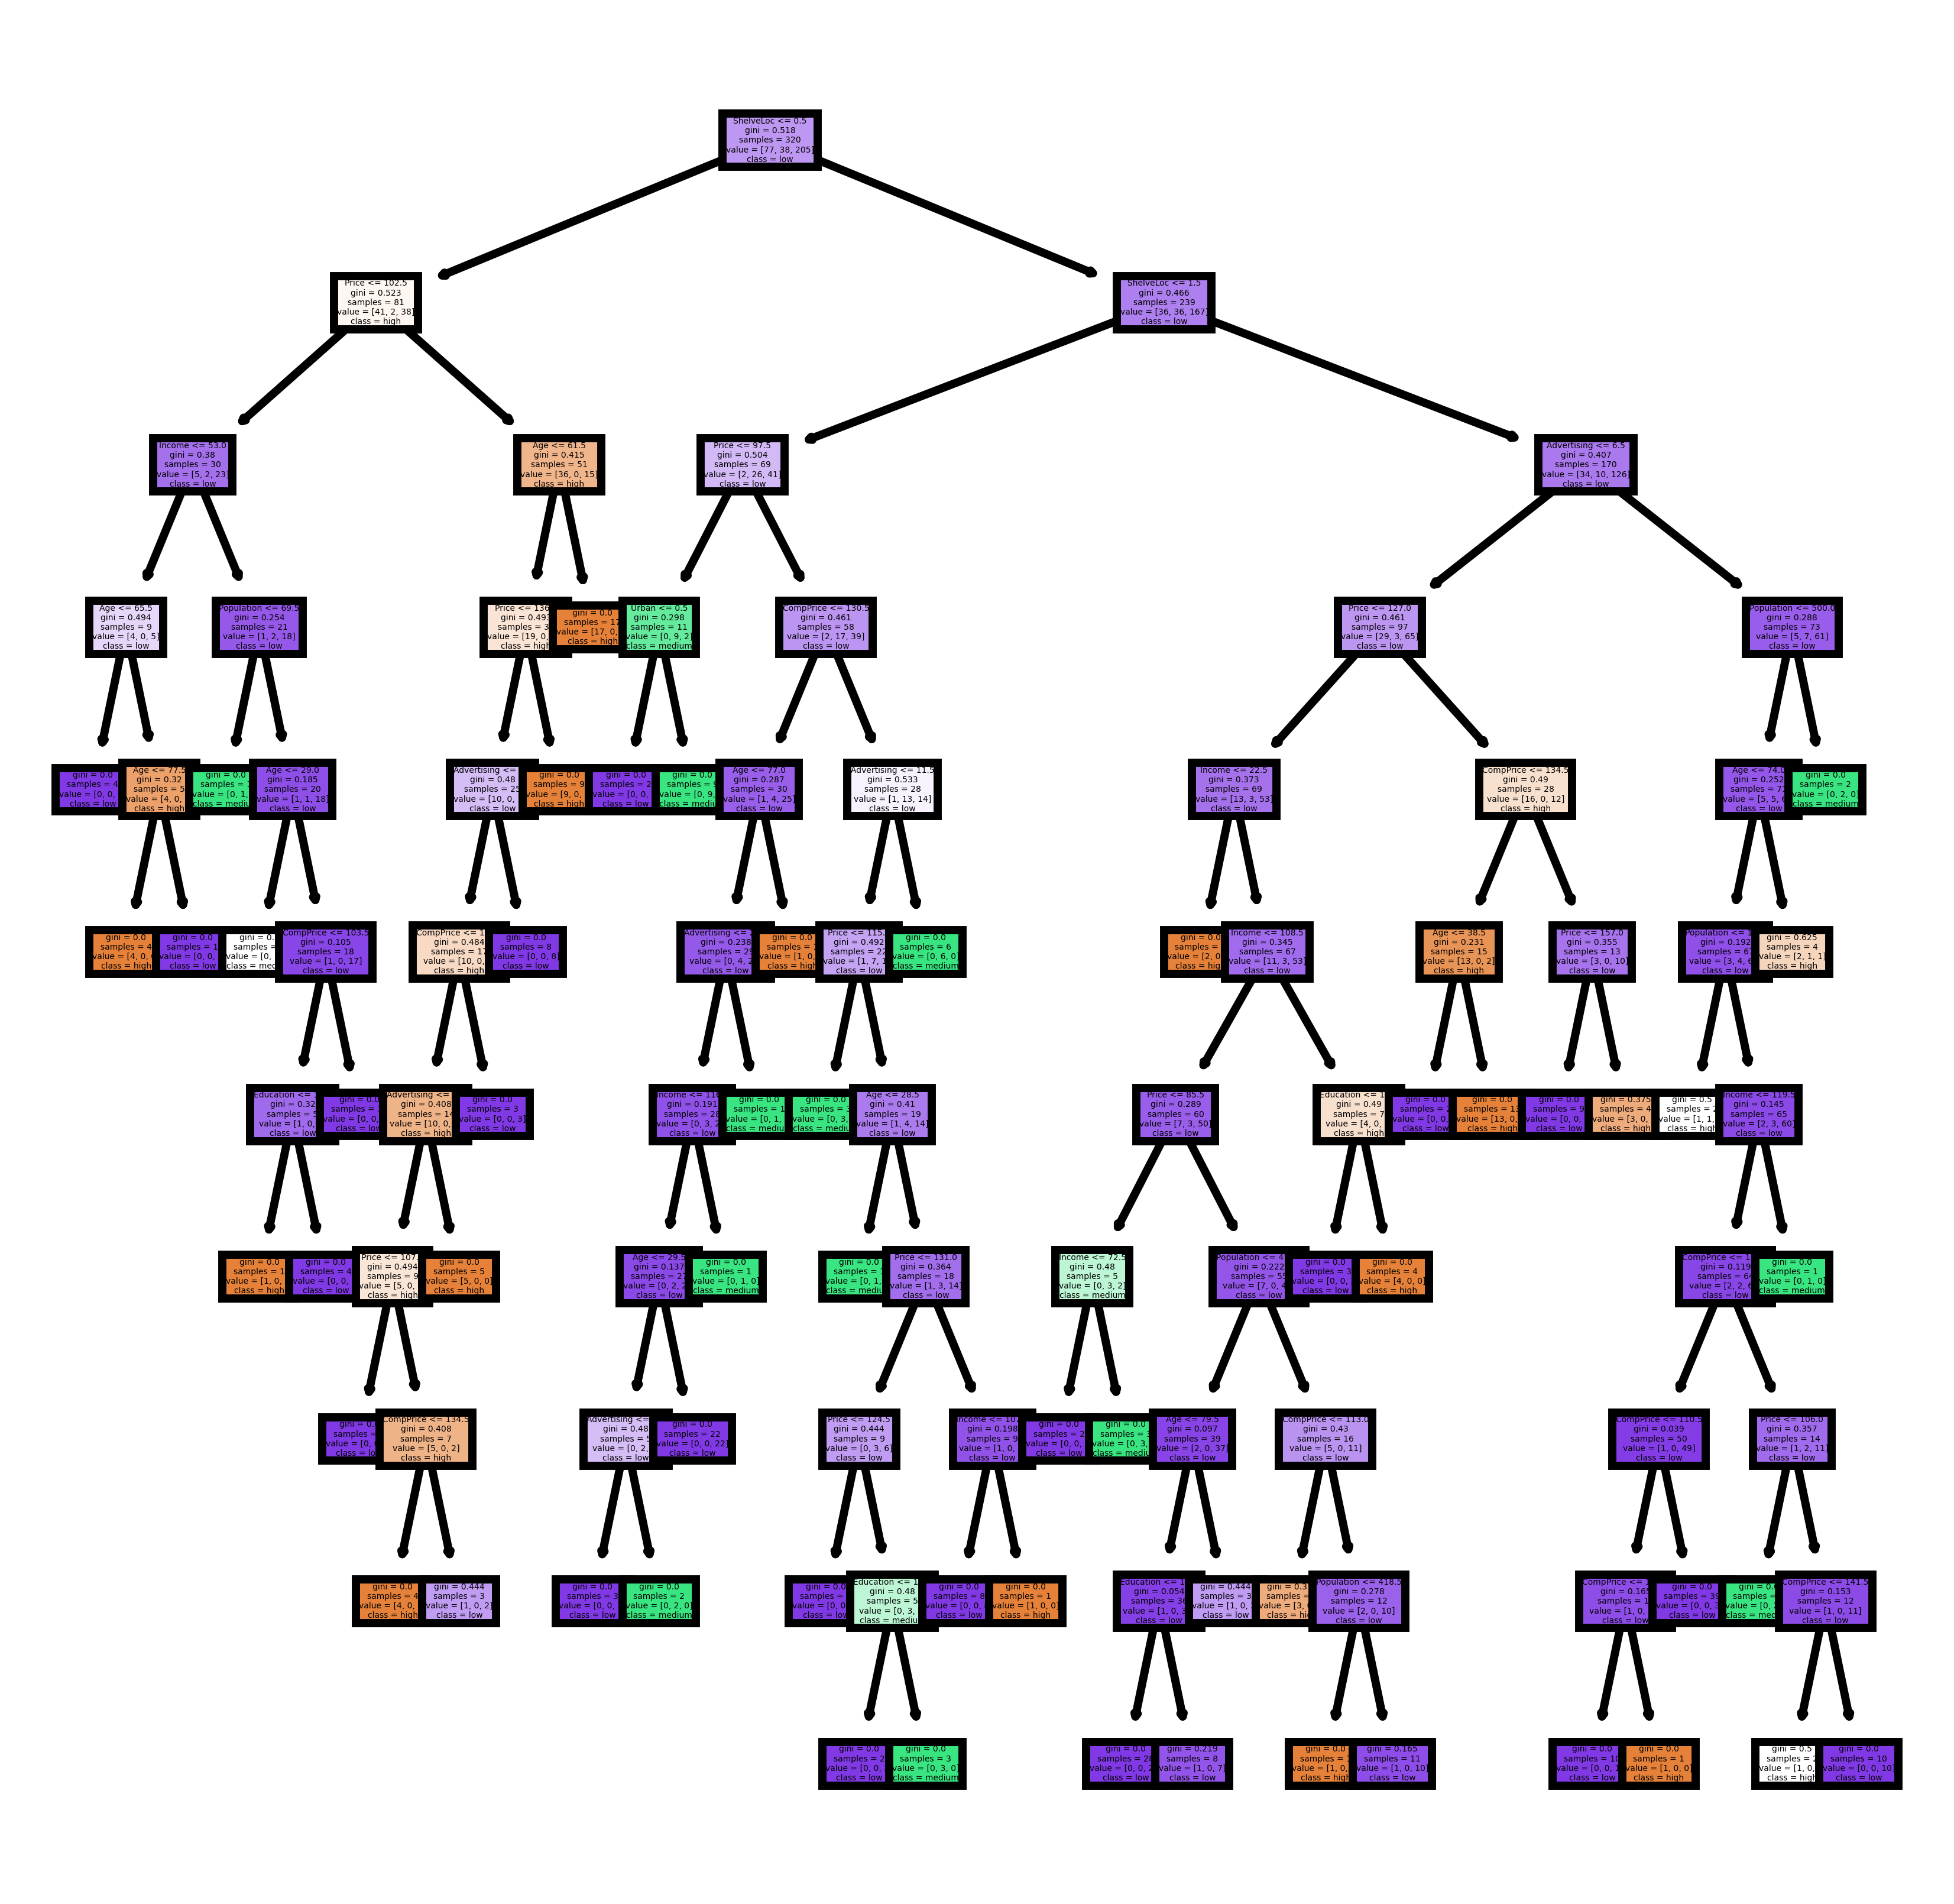

In [32]:
# Plotting decision tree for first model
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['high','medium','low']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize = (4,4), dpi=1000)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Accuracy

In [35]:
# Calculating Accuracies with help of testing data
print(classification_report(pred1,y_test))
print('='*60)
print('Accuracy :',metrics.accuracy_score(pred1,y_test))
print('='*60)
print('Confusion Matrix :',confusion_matrix(pred1,y_test))
print('='*60)

              precision    recall  f1-score   support

           0       0.60      0.88      0.71        17
           1       0.46      0.55      0.50        11
           2       0.86      0.69      0.77        52

    accuracy                           0.71        80
   macro avg       0.64      0.71      0.66        80
weighted avg       0.75      0.71      0.72        80

Accuracy : 0.7125
Confusion Matrix : [[15  0  2]
 [ 1  6  4]
 [ 9  7 36]]


# Building decision tree using 'entropy' criteria

In [36]:
# Build second model for decision tree by using entropy criteria
model2 = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=5,max_depth=10)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

In [37]:
# predicting second model
pred2 = model2.predict(x_test)

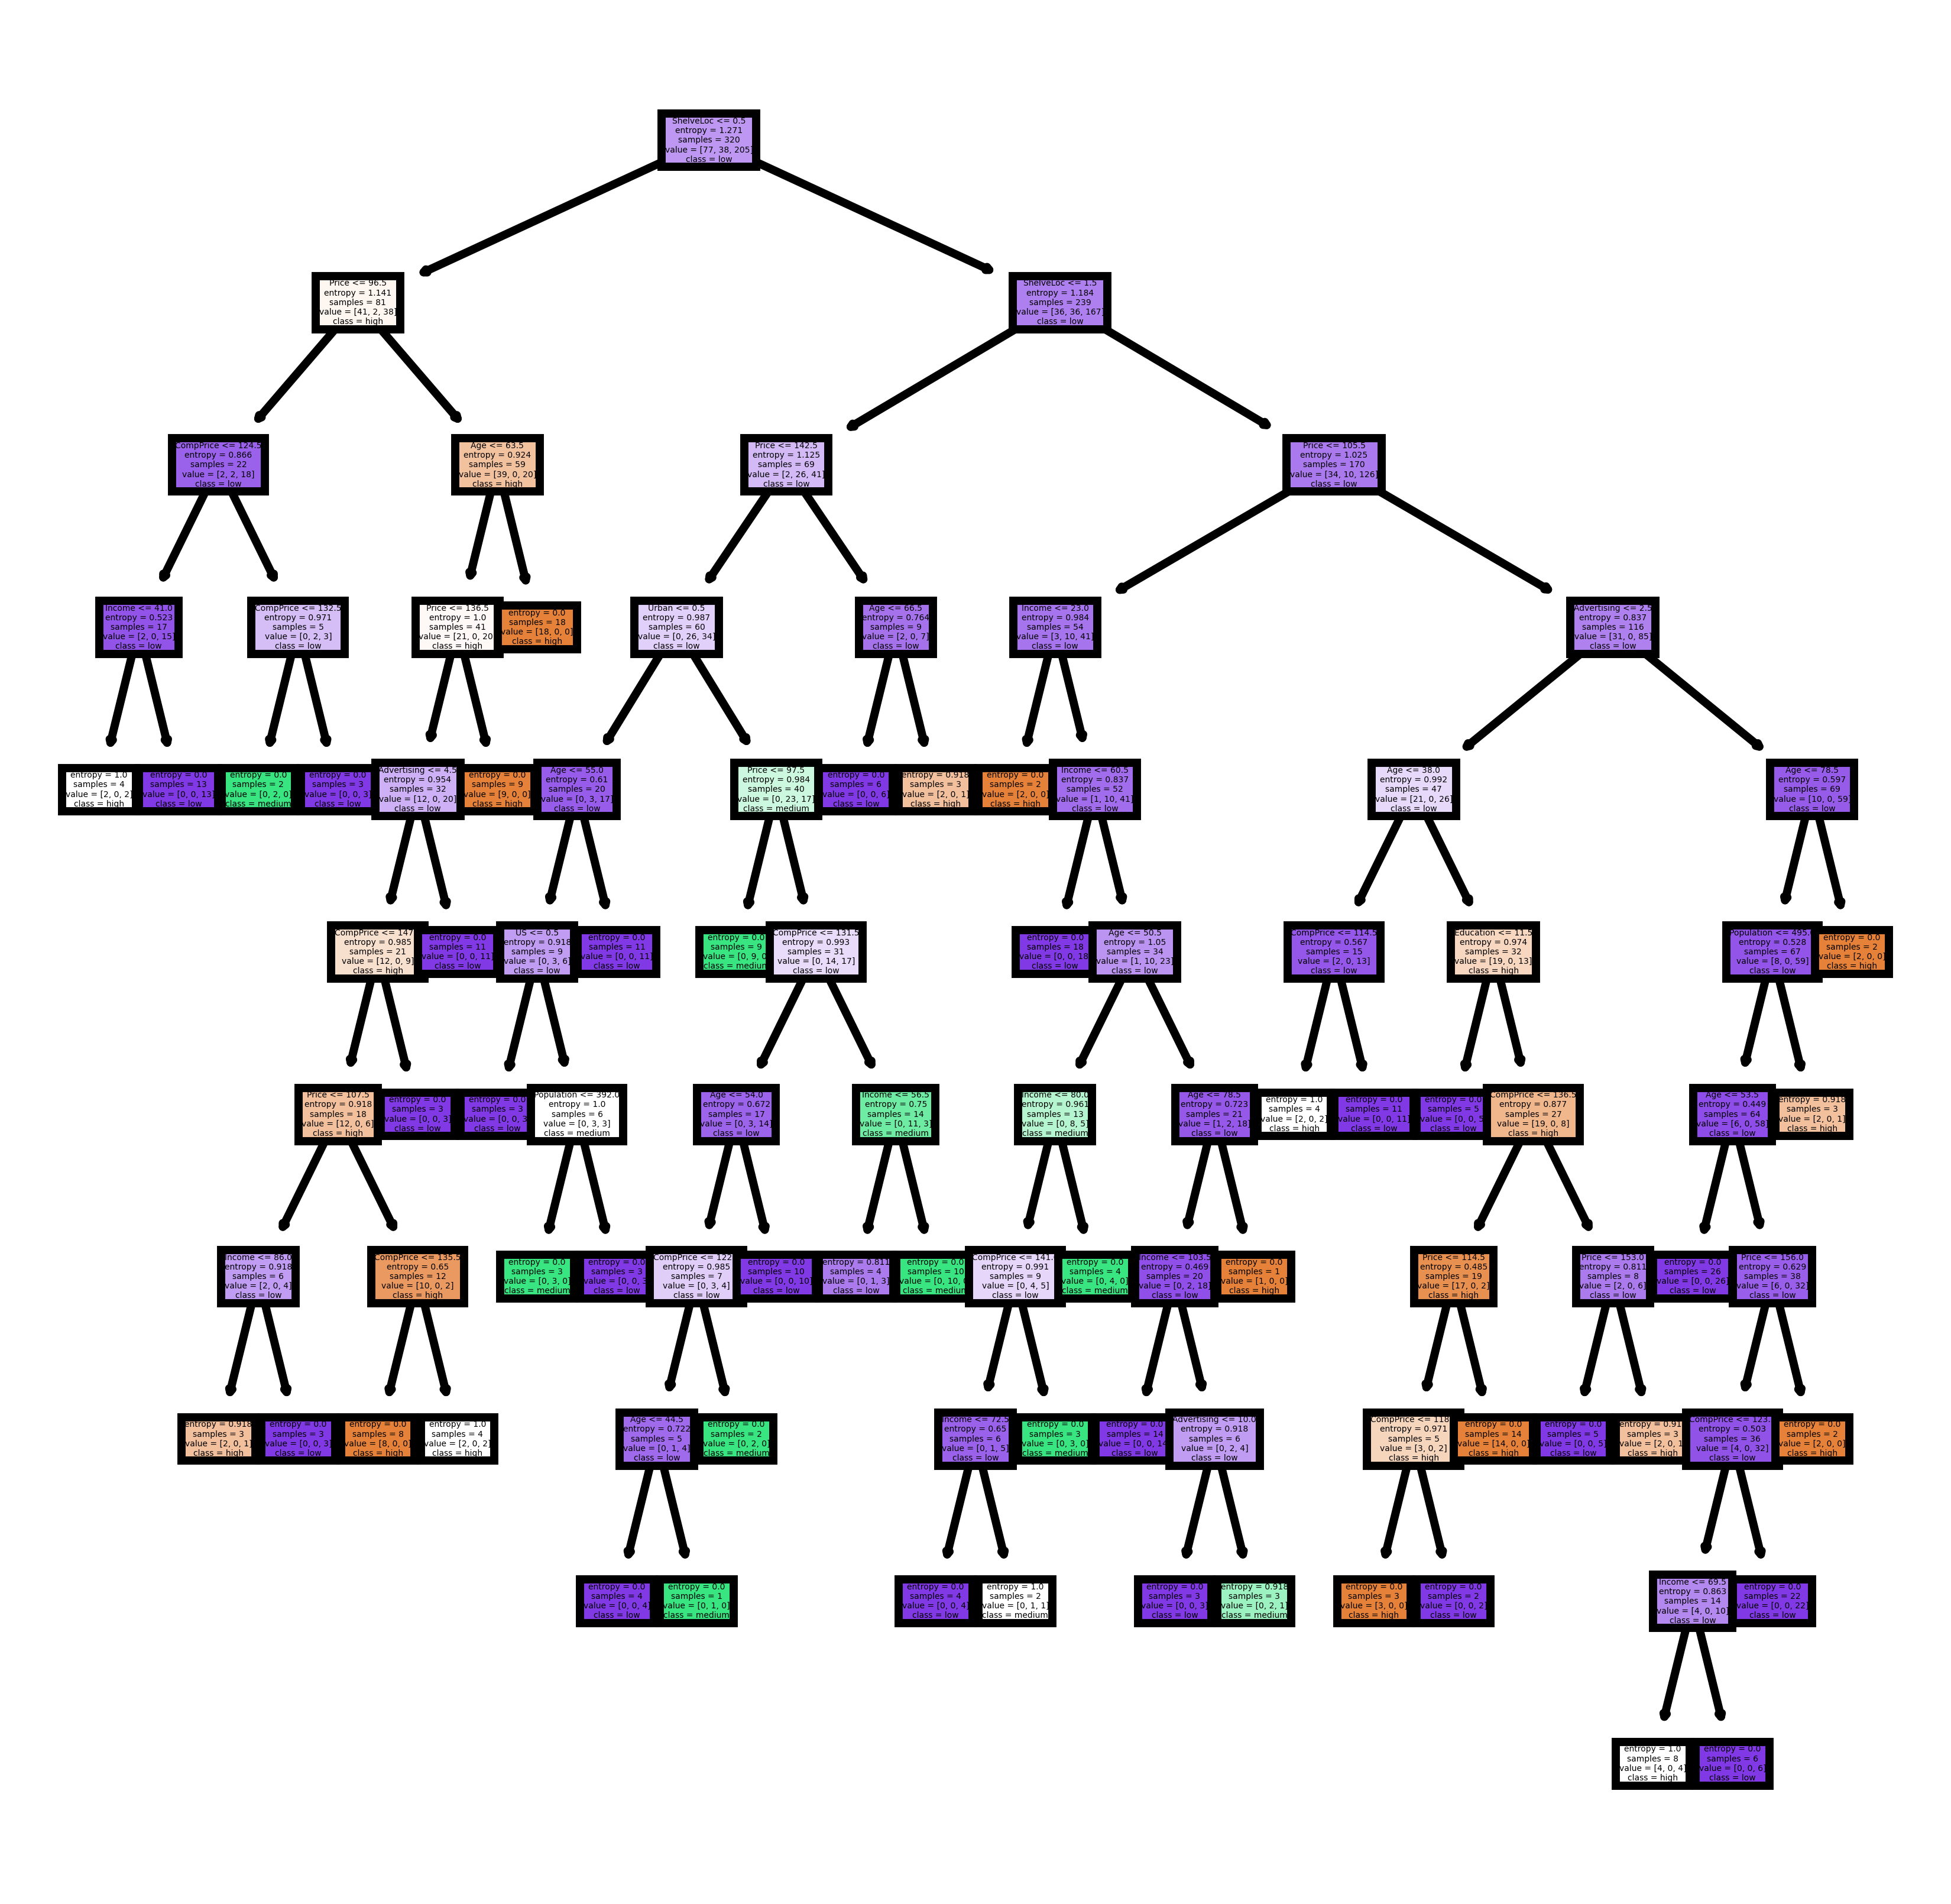

In [38]:
# plotting decision tree for second model
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['high','medium','low']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize = (4,4), dpi=1000)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Accuracy

In [40]:
# Calculating accuracies using testing data
print(classification_report(pred2,y_test))
print('='*60)
print('Accuracy :',metrics.accuracy_score(pred2,y_test))
print('='*60)
print('Confusion Matrix :',confusion_matrix(pred2,y_test))
print('='*60)

              precision    recall  f1-score   support

           0       0.60      0.75      0.67        20
           1       0.69      0.64      0.67        14
           2       0.76      0.70      0.73        46

    accuracy                           0.70        80
   macro avg       0.68      0.70      0.69        80
weighted avg       0.71      0.70      0.70        80

Accuracy : 0.7
Confusion Matrix : [[15  0  5]
 [ 0  9  5]
 [10  4 32]]


### Accuracy for ginni criteria is more than accuracy for entropy criteria.